In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import xarray as xr
import rasterio
import lxml 

from rasterio.crs import CRS
from pyproj import Transformer
import numpy as np
from shapely.geometry import Point, Polygon

In [204]:
land_dir = r"C:\Users\bmaro\OneDrive\Desktop\LandCharacter"
print(os.listdir(land_dir))


illinois_stateplane = CRS.from_epsg(26971)  # Illinois State Plane East (NAD83)

wgs84 = CRS.from_epsg(4326)  # WGS84 Latitude/Longitude

['README-info-560_013.txt', 'SAVANT_10cm_DEM.tif', 'SAVANT_1m_contours.png', 'SAVANT_1m_DEM.kml', 'SAVANT_1m_DEM.tfw', 'SAVANT_1m_DEM.tif', 'SAVANT_1m_DEM_projected.asc', 'SAVANT_1m_DEM_projected.prj', 'SAVANT_1m_DEM_projected.tif', 'SAVANT_Agisoft_Report.pdf', 'SAVANT_DEM_and_orthophoto_readme.pdf', 'SAVANT_ortho_10cm.tif', 'SAVANT_ortho_reduced.png']


CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre


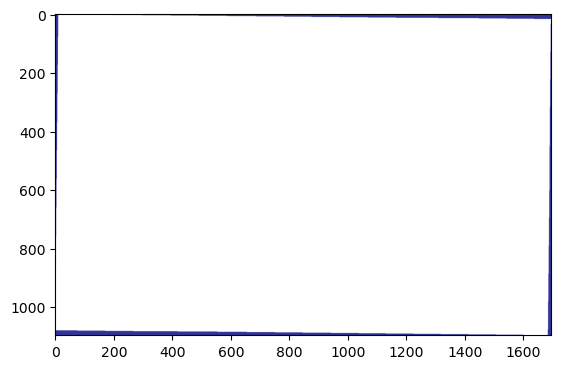

In [262]:
dem_10cm = 'SAVANT_10cm_DEM.tif'
dem_1m_proj = 'SAVANT_1m_DEM_projected.tif'

with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain')
    plt.show()
    

In [273]:
# build dictionary of tower locations
towers = {}
towers['init'] = {'name':'init','label':'Initiation Tower'}
towers['rel'] = {'name':'rel','label':'Release Tower'}
towers['uconv'] = {'name':'uconv','label':'Upper Convergence Tower'}
towers['lconv'] = {'name':'lconv','label':'Lower Convergence Tower'}


In [276]:
towers['init']['lat_lon_str'] = "40°12′41.4576′′N,88°24′37.98′′W"
towers['rel']['lat_lon_str'] = "40°12 ′42.1596′′N,88°24′26.046′′W"
towers['uconv']['lat_lon_str'] = "40°12 ′39.783′′N,88°24′19.605′′W"
towers['lconv']['lat_lon_str'] = "40°12 ′36.9′′N,88°24′13.3′′W"

def deg_to_dec(coord_str):
    lat_str, lon_str = coord_str.split(',')

    lat_dec = round(float(lat_str.split('°')[0]) 
               + float(lat_str.split('°')[1].split('′')[0])/60
               + float(lat_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)
    lon_dec = round(float(lon_str.split('°')[0]) 
               + float(lon_str.split('°')[1].split('′')[0])/60 
               + float(lon_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)

    if "s" in coord_str.lower():
        lat_dec = (lat_dec*-1)
    if "w" in coord_str.lower():
        lon_dec = (lon_dec*-1)
        
    return [(lat_dec), (lon_dec)]


for tower, data in towers.items():
    print(f"{tower}: {data}")
    coords=deg_to_dec(towers[tower]['lat_lon_str'])
    towers[tower]['lat_lon'] = coords
    transformer = Transformer.from_crs(wgs84, illinois_stateplane, always_xy=True)
    x, y = transformer.transform(coords[1], coords[0])
    towers[tower]['x_y'] = [x, y]
    print(f"  lat/lon: {towers[tower]['lat_lon']}, projected x/y: {towers[tower]['x_y']}")






init: {'name': 'init', 'label': 'Initiation Tower', 'lat_lon_str': '40°12′41.4576′′N,88°24′37.98′′W', 'lat_lon': [40.211516, -88.41055], 'x_y': [293426.78451102215, 393488.8263018386]}
  lat/lon: [40.211516, -88.41055], projected x/y: [293426.78451102215, 393488.8263018386]
rel: {'name': 'rel', 'label': 'Release Tower', 'lat_lon_str': '40°12 ′42.1596′′N,88°24′26.046′′W', 'lat_lon': [40.211711, -88.407235], 'x_y': [293709.00153141556, 393510.23896109697]}
  lat/lon: [40.211711, -88.407235], projected x/y: [293709.00153141556, 393510.23896109697]
uconv: {'name': 'uconv', 'label': 'Upper Convergence Tower', 'lat_lon_str': '40°12 ′39.783′′N,88°24′19.605′′W', 'lat_lon': [40.211051, -88.405446], 'x_y': [293861.23548035475, 393436.8307068228]}
  lat/lon: [40.211051, -88.405446], projected x/y: [293861.23548035475, 393436.8307068228]
lconv: {'name': 'lconv', 'label': 'Lower Convergence Tower', 'lat_lon_str': '40°12 ′36.9′′N,88°24′13.3′′W', 'lat_lon': [40.21025, -88.403694], 'x_y': [294010.3102

CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre
elevation at Initiation Tower: 235.9046173095703 m
Initiation Tower: col=464, row=513, shape=(1097, 1696)
elevation at Release Tower: 235.08413696289062 m
Release Tower: col=746, row=492, shape=(1097, 1696)
elevation at Upper Convergence Tower: 233.22525024414062 m
Upper Convergence Tower: col=899, row=565, shape=(1097, 1696)
elevation at Lower Convergence Tower: 231.7415771484375 m
Lower Convergence Tower: col=1048, row=654, shape=(1097, 1696)


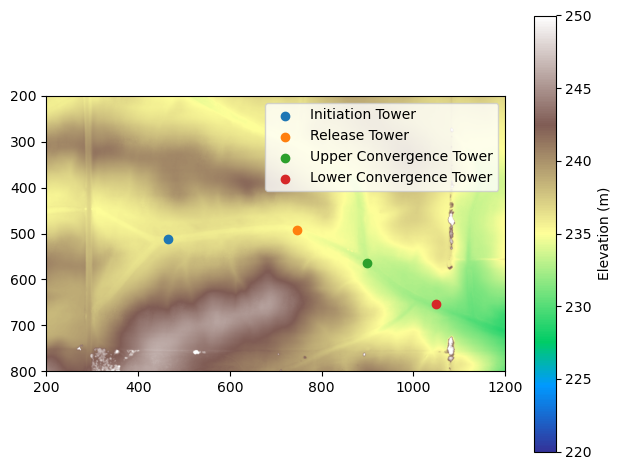

In [293]:
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        print(f'elevation at {data["label"]}: {elevation[row, col]} m')
        print(f"{data['label']}: col={col}, row={row}, shape={elevation.shape}")
        plt.scatter(col, row, label=data['label'])
    plt.xlim(200, 1200)
    plt.ylim(800, 200)
    plt.legend()
    plt.tight_layout()
    plt.show()